## Dataset Regresión Lineal - Grupo 21

### Pasos de la actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [34]:
#cargar las librerias necesarias
import pandas as pd #maneja y analisa estructura de datos.
import numpy as np # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # crea graficos en 2 dimensiones

# librerias para implementar modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import hvplot.pandas

In [5]:
# Lectura de datos y se cargan en la variable datos
Dataset = pd.read_csv('./Car_details_v3.csv')

In [6]:
# se realiza la lectura de los datos para el analisis exploratorio
Dataset.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [7]:
#Describir los datos
Dataset.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


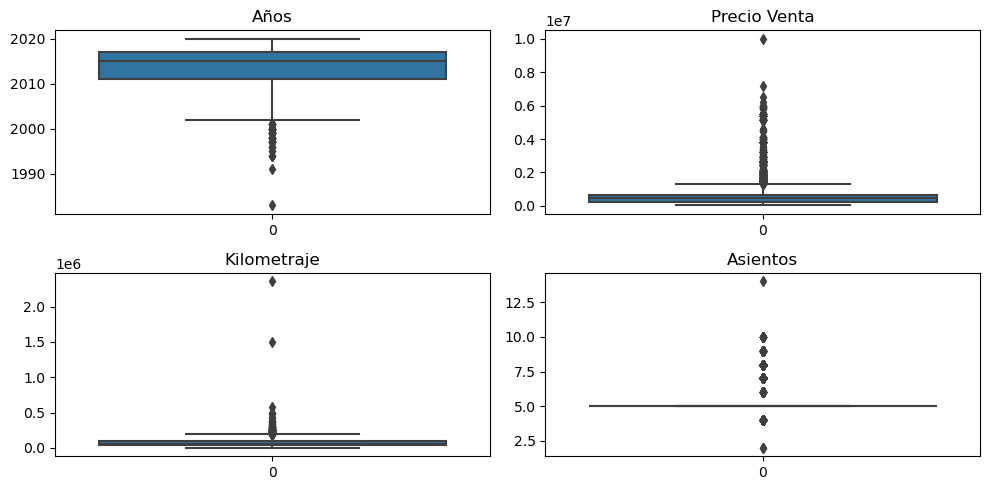

In [8]:
# Identificacion de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Dataset['year'], ax = axs[0,0]).set_title("Años")
plt2 = sns.boxplot(Dataset['selling_price'], ax = axs[0,1]).set_title("Precio Venta")
plt3 = sns.boxplot(Dataset['km_driven'], ax = axs[1,0]).set_title("Kilometraje")
plt1 = sns.boxplot(Dataset['seats'], ax = axs[1,1]).set_title("Asientos")

plt.tight_layout()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

### Datos faltantes

In [9]:
#Revision de datos faltantes

#Registros numéricos
print("Cantidad de registros con 0 en años de vehículo es de: ", (Dataset['year'].isin([0]).sum() + + Dataset['year'].isna().sum()))
print("Cantidad de registros con 0 en precios de venta es de: ", (Dataset['selling_price'].isin([0]).sum() + + Dataset['selling_price'].isna().sum()))
print("Cantidad de registros con 0 en kilometrajes es de: ", (Dataset['km_driven'].isin([0]).sum() + + Dataset['km_driven'].isna().sum()))
print("Cantidad de registros con 0 en asientos es de: ", (Dataset['seats'].isin([0]).sum() + Dataset['seats'].isna().sum()))

#Registros textuales
print("Cantidad de registros nulos en nombre es de: ", (Dataset['name'].isin([0]).sum() + + Dataset['name'].isna().sum()))
print("Cantidad de registros nulos en gasolina es de: ", (Dataset['fuel'].isin([0]).sum() + + Dataset['fuel'].isna().sum()))
print("Cantidad de registros nulos en vendedor es de: ", (Dataset['seller_type'].isin([0]).sum() + + Dataset['seller_type'].isna().sum()))
print("Cantidad de registros nulos en trasmision es de: ", (Dataset['transmission'].isin([0]).sum() + Dataset['transmission'].isna().sum()))
print("Cantidad de registros nulos en propietario es de: ", (Dataset['owner'].isin([0]).sum() + Dataset['owner'].isna().sum()))
print("Cantidad de registros nulos en millaje es de: ", (Dataset['mileage'].isin([0]).sum() + Dataset['mileage'].isna().sum()))
print("Cantidad de registros nulos en motor es de: ", (Dataset['engine'].isin([0]).sum() + Dataset['engine'].isna().sum()))
print("Cantidad de registros nulos en potencia maxima es de: ", (Dataset['max_power'].isin([0]).sum() + Dataset['max_power'].isna().sum()))
print("Cantidad de registros nulos en torques es de: ", (Dataset['torque'].isin([0]).sum() + Dataset['torque'].isna().sum()))

Cantidad de registros con 0 en años de vehículo es de:  0
Cantidad de registros con 0 en precios de venta es de:  0
Cantidad de registros con 0 en kilometrajes es de:  0
Cantidad de registros con 0 en asientos es de:  221
Cantidad de registros nulos en nombre es de:  0
Cantidad de registros nulos en gasolina es de:  0
Cantidad de registros nulos en vendedor es de:  0
Cantidad de registros nulos en trasmision es de:  0
Cantidad de registros nulos en propietario es de:  0
Cantidad de registros nulos en millaje es de:  221
Cantidad de registros nulos en motor es de:  221
Cantidad de registros nulos en potencia maxima es de:  215
Cantidad de registros nulos en torques es de:  222


In [10]:
# Reemplazar los ceros o vacíos con el valor medio o la moda de la columna

#Asientos
Dataset['seats'] = Dataset['seats'].mask(Dataset['seats']=='nan', None).ffill()

#Millaje - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['mileage'] = Dataset['mileage'].mask(Dataset['mileage']=='nan', None).ffill()

#Motor - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['engine'] = Dataset['engine'].mask(Dataset['engine']=='nan', None).ffill()

#Potencia - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['max_power'] = Dataset['max_power'].mask(Dataset['max_power']=='nan', None).ffill()

#Torque - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['torque'] = Dataset['torque'].mask(Dataset['torque']=='nan', None).ffill()

In [11]:
#Se vuelven a verificar los datos faltantes

#Registros numéricos
print("Cantidad de registros con 0 en asientos es de: ", (Dataset['seats'].isin([0]).sum() + Dataset['seats'].isna().sum()))

#Registros textuales
print("Cantidad de registros nulos en millaje es de: ", (Dataset['mileage'].isin([0]).sum() + Dataset['mileage'].isna().sum()))
print("Cantidad de registros nulos en motor es de: ", (Dataset['engine'].isin([0]).sum() + Dataset['engine'].isna().sum()))
print("Cantidad de registros nulos en potencia maxima es de: ", (Dataset['max_power'].isin([0]).sum() + Dataset['max_power'].isna().sum()))
print("Cantidad de registros nulos en torques es de: ", (Dataset['torque'].isin([0]).sum() + Dataset['torque'].isna().sum()))

Cantidad de registros con 0 en asientos es de:  0
Cantidad de registros nulos en millaje es de:  0
Cantidad de registros nulos en motor es de:  0
Cantidad de registros nulos en potencia maxima es de:  0
Cantidad de registros nulos en torques es de:  0


### Datos Atípicos

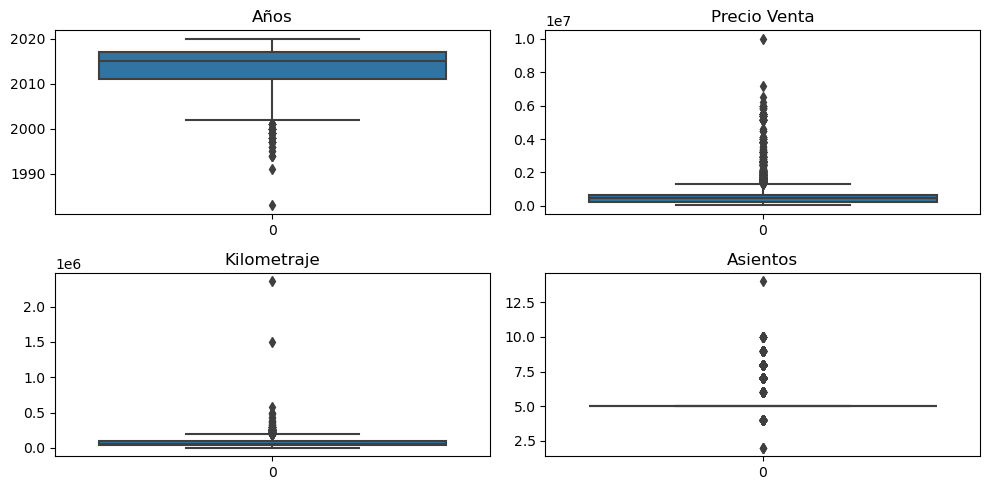

In [12]:
# Identificación de datos atípicos

fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Dataset['year'], ax = axs[0,0]).set_title("Años")
plt2 = sns.boxplot(Dataset['selling_price'], ax = axs[0,1]).set_title("Precio Venta")
plt3 = sns.boxplot(Dataset['km_driven'], ax = axs[1,0]).set_title("Kilometraje")
plt1 = sns.boxplot(Dataset['seats'], ax = axs[1,1]).set_title("Asientos")

plt.tight_layout()

In [13]:
# Conteo de datos atipicos

#Años
years_nivel_minimo = 1980
years_nivel_maximo = 2023
years_Total_Atipicos = ((Dataset['year']<years_nivel_minimo) | (Dataset['year']>years_nivel_maximo)).sum()
print("El total de los años atipicos es: {}".format(years_Total_Atipicos))

#Precio de venta
price_nivel_minimo = 30000
price_nivel_maximo = 5000000
price_Total_Atipicos = ((Dataset['selling_price']<price_nivel_minimo) | (Dataset['selling_price']>price_nivel_maximo)).sum()
print("El total de los precios atipicos es: {}".format(price_Total_Atipicos))

#Kilometraje
kms_nivel_minimo = 1
kms_nivel_maximo = 150000
kms_Total_Atipicos = ((Dataset['km_driven']<kms_nivel_minimo) | (Dataset['km_driven']>kms_nivel_maximo)).sum()
print("El total de los kilometrajes atipicos es: {}".format(kms_Total_Atipicos))

#Asientos
seats_nivel_minimo = 5
seats_nivel_maximo = 7
seats_Total_Atipicos = ((Dataset['seats']<seats_nivel_minimo) | (Dataset['seats']>seats_nivel_maximo)).sum()
print("El total de los asientos atipicos es: {}".format(seats_Total_Atipicos))
print("total asientos: {}".format(Dataset['seats'].count()))

El total de los años atipicos es: 0
El total de los precios atipicos es: 118
El total de los kilometrajes atipicos es: 392
El total de los asientos atipicos es: 487
total asientos: 8128


In [14]:
# Se filtran datos atipicos

#Años
Dataset=Dataset[(Dataset['year']<years_nivel_maximo)&(Dataset['year']>years_nivel_minimo)]

#Precios
Dataset=Dataset[(Dataset['selling_price']<price_nivel_maximo)&(Dataset['selling_price']>price_nivel_minimo)]

#Kilometraje
Dataset=Dataset[(Dataset['km_driven']<kms_nivel_maximo)&(Dataset['km_driven']>kms_nivel_minimo)]

#Asientos
Dataset=Dataset[(Dataset['seats']<=seats_nivel_maximo)&(Dataset['seats']>=seats_nivel_minimo)]

In [15]:
# Se valida si se removieron los datos atipicos

#Años
years_Total_Atipicos = ((Dataset['year']<years_nivel_minimo) | (Dataset['year']>years_nivel_maximo)).sum()
print("El total de los años atipicos es: {}".format(years_Total_Atipicos))

#Precio de venta
price_Total_Atipicos = ((Dataset['selling_price']<price_nivel_minimo) | (Dataset['selling_price']>price_nivel_maximo)).sum()
print("El total de los precios atipicos es: {}".format(price_Total_Atipicos))

#Kilometraje
kms_Total_Atipicos = ((Dataset['km_driven']<kms_nivel_minimo) | (Dataset['km_driven']>kms_nivel_maximo)).sum()
print("El total de los kilometrajes atipicos es: {}".format(kms_Total_Atipicos))

#Asientos
seats_Total_Atipicos = ((Dataset['seats']<seats_nivel_minimo) | (Dataset['seats']>seats_nivel_maximo)).sum()
print("El total de los asientos atipicos es: {}".format(seats_Total_Atipicos))

El total de los años atipicos es: 0
El total de los precios atipicos es: 0
El total de los kilometrajes atipicos es: 0
El total de los asientos atipicos es: 0


### Limpieza de dígitos en Millaje, Potencia y Asientos para su utilización

In [16]:
#Limpiamos valores utiles para manejarlos

#Millaje - Sacamos dígitos del string y los volvemos un entero
Dataset['mileage'] = (Dataset['mileage'].astype("string")).str.extract('(\d+)').astype('int64')

#Potencia - Sacamos dígitos del string y los volvemos un entero
Dataset['max_power'] = (Dataset['max_power'].astype("string")).str.extract('(\d+)').astype('int64')

#Asientos - Los convertimos en enteros
Dataset['seats'] = Dataset['seats'].astype('int64')

In [17]:
#revision de tipo de datos y datos faltantes

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7158 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           7158 non-null   object
 1   year           7158 non-null   int64 
 2   selling_price  7158 non-null   int64 
 3   km_driven      7158 non-null   int64 
 4   fuel           7158 non-null   object
 5   seller_type    7158 non-null   object
 6   transmission   7158 non-null   object
 7   owner          7158 non-null   object
 8   mileage        7158 non-null   int64 
 9   engine         7158 non-null   object
 10  max_power      7158 non-null   int64 
 11  torque         7158 non-null   object
 12  seats          7158 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 782.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:
- Columna "Selling_Prices" pues nos ayudará a predecir el precio del vehículo.

In [18]:
# Vista de los distintos precios

Dataset['selling_price'].value_counts()

selling_price
300000     209
350000     189
600000     186
550000     177
450000     175
          ... 
698000       1
539000       1
571000       1
4090000      1
746000       1
Name: count, Length: 620, dtype: int64

In [19]:
Dataset[['selling_price']].head(20)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
8,350000
10,500000
11,92000
12,280000


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [20]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento

# Se cargan los datos de train sin los datos de la columna selling_price ni los datos que contengan texto
X = Dataset.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner',
                 'engine', 'torque'],axis=1)
Y = Dataset['selling_price'] # Se cargan los datos de train con  los datos de la la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [21]:
print (X_train)

      year  km_driven  mileage  max_power  seats
6331  2011     110000       23         63      5
6425  2014      60000       18         82      5
2541  2016      30000       15        120      7
5322  1991     120000       13        147      7
6860  2015     140000       20         68      5
...    ...        ...      ...        ...    ...
1670  2013      80000       23         74      5
7388  2012      80000       20         67      5
504   2017      90000       23         84      5
2989  2016      68000       27         98      5
4634  2011      40000       21         85      5

[5368 rows x 5 columns]


In [22]:
print (Y_train)

6331     210000
6425     375000
2541    1250000
5322      55000
6860     300000
         ...   
1670     480000
7388     110000
504      450000
2989     425000
4634     215000
Name: selling_price, Length: 5368, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparametros

In [23]:
# Construir el modelo de regresión lineal 

modelo_regresion = LinearRegression() # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit(X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [24]:
print (modelo_regresion.coef_)

[ 3.67274696e+04 -2.10733456e+00  7.06412081e+03  1.26949234e+04
 -8.77046884e+03]


In [25]:
#Generamos tabla con los coeficientes de predicción del modelo

pd.DataFrame(modelo_regresion.coef_, X.columns, columns = ['Coedicients']) #Cada coeficiente indica un incremento en la variable final, el precio

,Coedicients
year,36727.469635
km_driven,-2.107335
mileage,7064.120814
max_power,12694.923418
seats,-8770.468841


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [26]:
# Coeficiente de determinación "r2 score"

print(r2_score(Y_test,Prediccion))

0.646421896090908


In [27]:
# Error absoluto medio

MAE= metrics.mean_absolute_error(Y_test, Prediccion)
print(MAE)

205876.12012497493


In [28]:
# Error cuadrático medio

MSE=metrics.mean_squared_error(Y_test, Prediccion)
print(MSE)

114146640357.0763


In [29]:
# Distancia media cuadrática mínima 

RMSE= np.sqrt(MSE)
print(RMSE)

337855.94616208295


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Text(0, 0.5, 'Prediccion')

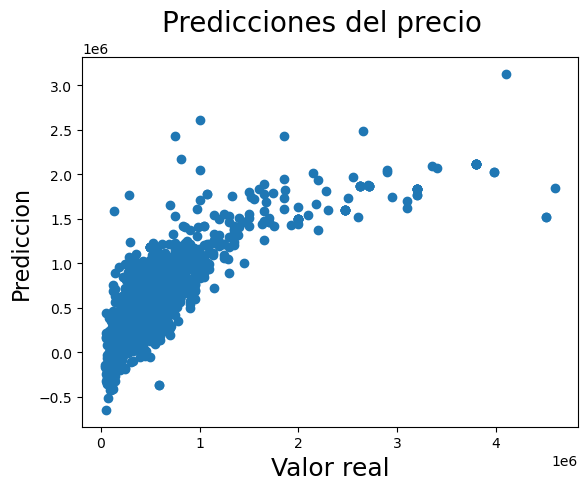

In [30]:
# Gráfico de dispersión

fig = plt.figure()
plt.scatter(Y_test, Prediccion)
fig.suptitle('Predicciones del precio', fontsize=20)           # título 
plt.xlabel('Valor real', fontsize=18)                          # Valores realides de Y_Test
plt.ylabel('Prediccion', fontsize=16)                          # Valores predecidos

Text(0.5, 0, 'Residuos precios')

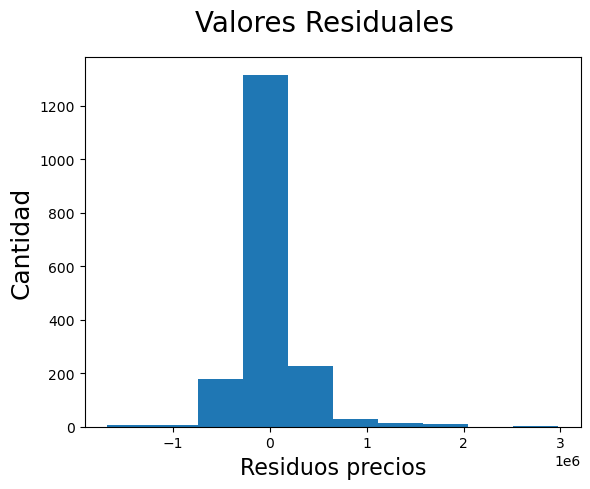

In [46]:
#Histograma

fig = plt.figure()
plt.hist(Y_test - Prediccion)
fig.suptitle('Valores Residuales', fontsize=20)           # título 
plt.ylabel('Cantidad', fontsize=18)                          # Valores realides de Y_Test
plt.xlabel('Residuos precios', fontsize=16)                          # Valores predecidos

## 8. Interpretar, analizar y documentar los resultados obtenidos.

Del desempeño del modelo podemos deducir que:
- Coeficiente de determinación: El "r2 score" o "R cuadrado" nos indica el nivel de fiabilidad del modelo según la relación entre la variable dependiente con las independientes. Entre más cercano a 1 mayor la fiabilidad. Para este caso podemos concluir que el modelo tiene un índice de fiabilidad aceptable, pues su Rcuadrado es de 0.63.
- Error Absoluto Medio (MAE): Este valor nos indica el promedio de la diferencia absoluta entre los valores reales y los predichos, la cual para este caso se evidencia que es de 214333.4.
- Error Cuadrático Medio (MSE): Este valor nos indica el valor promedio de los valores residuales obtenidos de la diferencia entre los valores reales y los predichos. Para este caso, el dataset presenta un error cuadrático medio de 107834907154.6 en los valores de los precios.
- Distancia media cuadrática Mínima (RMSE): Nos indica el ajuste absoluto del modelo de datos, es decir, qué tan cerca se encuentran los valores reales de los valores predichos por el modelo. Entre menor sea el valor, mayor la fiabilidad del modelo. Para este caso, se obtuvo un RMSE de 328382.2.

Del gráfico de dispersión de valores predichos podemos interpretar que cuanto menor sea el valor del precio, mejor son las predicciones, y que por otro lado, entre mayor sea el precio, menos acertadas serán las predicciones. Gracias al valor calculado del coeficiente de determinación, podemos confirmar que esto significa que nuestro modelo tiene un porcentaje de fiabilidad del 63%.

En el histograma de valores residuales de nuestro modelo podemos observar una distribución normal, lo cual indica que el modelo realizado ha cumplido con su funcionalidad, lo cuál podemos confirmar al observar que hay una mayor cantidad de residuos con valor de 0 ya que como se indica en el valor cuadrático medio (MSE), entre menor sean los valores de los residuos, mejor será la fiabilidad del modelo. 
  